In [25]:
from hiive.mdptoolbox import example, mdp
import matplotlib.pyplot as plt

# Transition (P)robability matrix and (R)eward matrix
# S: states, r1: Wait reward, r2: Cut reward, p: wildfire occurrence probability
forest_P, forest_R = example.forest(S=50, r1=4, r2=2, p=0.1, is_sparse=False)
# gamma: discount factor
# n_iter: default 10k, ignored unless greater int passed
forest_q = mdp.QLearning(forest_P, forest_R, gamma=0.9, n_iter=10000000)
forest_q.run()

forest_iters = [v["Iteration"] for v in forest_q.run_stats]
forest_error = [v["Error"] for v in forest_q.run_stats]
forest_times = [v["Time"] for v in forest_q.run_stats]
forest_alpha = [v["Alpha"] for v in forest_q.run_stats]
forest_epsln = [v["Epsilon"] for v in forest_q.run_stats]
forest_gamma = [v["Gamma"] for v in forest_q.run_stats]
forest_vvvvv = [v["V[0]"] for v in forest_q.run_stats]
forest_max_v = [v["Max V"] for v in forest_q.run_stats]
forest_meanv = [v["Mean V"] for v in forest_q.run_stats]

print(forest_q.run_stats[-1])

{'State': 11, 'Action': 0, 'Reward': 0.0, 'Error': 0.0011251697430028557, 'Time': 278.1871840953827, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'V[0]': 4.4704402433635355, 'Max V': 23.466955821907383, 'Mean V': 4.8247081573284785, 'Iteration': 10000000}


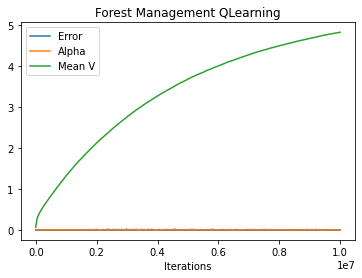

In [26]:
# Plot Forest Management

plt.figure()
plt.plot(forest_iters, forest_error, label="Error")
# plt.plot(forest_iters, forest_times, label="CPU Time (s)")
plt.plot(forest_iters, forest_alpha, label="Alpha")
# plt.plot(forest_iters, forest_epsln, label="Discount Factor")
# plt.plot(forest_iters, forest_gamma, label="Stopping Criterion")
# plt.plot(forest_iters, forest_max_v, label="Max V")
plt.plot(forest_iters, forest_meanv, label="Mean V")
plt.title("Forest Management QLearning")
plt.xlabel("Iterations")
plt.legend(loc="best")
plt.savefig("forest_qlearning_10m.png", bbox_inches="tight")
plt.show()

In [27]:
from gym.envs.toy_text.frozen_lake import generate_random_map
# size: size of each side of the grid
# p: probability that a tile is frozen
# state is the agent's position on the grid; all possible positions == all possible states
random_map = generate_random_map(size=100, p=0.9)
# This function sets rewards for cells that do not lead to the goal state as 0.0
# This may not be desirable in a large state space as many more iterations are needed to see a result.
# To fix, update the random_map matrix:
# TODO Count hole cells, then +1 for the goal (frisbee) cell
# TODO Subtract above from total number of cells to get the total number of all ice cells (num_ice_cells)
# TODO Replace each 0.0 in the random_map matrix with 1/num_ice_cells

# Transition (P)robability matrix and (R)eward matrix
frozen_P, frozen_R = example.openai("FrozenLake-v1", desc=random_map)
# gamma: discount factor
# n_iter: default 10k, ignored unless greater int passed
frozen_q = mdp.QLearning(frozen_P, frozen_R, gamma=0.9, n_iter=10000000)
frozen_q.run()
# print(frozen_q.run_stats)
frozen_iters = [v["Iteration"] for v in frozen_q.run_stats]
frozen_error = [v["Error"] for v in frozen_q.run_stats]
frozen_times = [v["Time"] for v in frozen_q.run_stats]
frozen_alpha = [v["Alpha"] for v in frozen_q.run_stats]
frozen_epsln = [v["Epsilon"] for v in frozen_q.run_stats]
frozen_gamma = [v["Gamma"] for v in frozen_q.run_stats]
frozen_vvvvv = [v["V[0]"] for v in frozen_q.run_stats]
frozen_max_v = [v["Max V"] for v in frozen_q.run_stats]
frozen_meanv = [v["Mean V"] for v in frozen_q.run_stats]

print(frozen_q.run_stats[-1])

{'State': 5770, 'Action': 0, 'Reward': 0.0, 'Error': 0.0, 'Time': 19161.286463737488, 'Alpha': 0.001, 'Epsilon': 0.1, 'Gamma': 0.9, 'V[0]': 0.0, 'Max V': 0.014675647412231931, 'Mean V': 1.4870820162435081e-06, 'Iteration': 10000000}


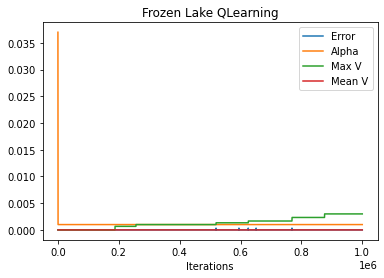

In [20]:
# Plot Frozen Lake

plt.figure()
plt.plot(frozen_iters, frozen_error, label="Error")
# plt.plot(frozen_iters, frozen_times, label="CPU Time (s)")
plt.plot(frozen_iters, frozen_alpha, label="Alpha")
# plt.plot(frozen_iters, frozen_epsln, label="Discount Factor")
# plt.plot(frozen_iters, frozen_gamma, label="Stopping Criterion")
plt.plot(frozen_iters, frozen_max_v, label="Max V")
plt.plot(frozen_iters, frozen_meanv, label="Mean V")
plt.title("Frozen Lake QLearning")
plt.xlabel("Iterations")
plt.legend(loc="best")
plt.savefig("frozen_qlearning.png", bbox_inches="tight")
plt.show()